In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
data_path = r"C:\Users\sm185567\Downloads\bug files\springfulldataset.csv"

In [4]:
data_raw = pd.read_csv(data_path,encoding = 'ISO-8859-15')

data_raw.shape

(22321, 5)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 22321
Number of columns in data = 5




**Sample data:**

,Unnamed: 0,Priority,Created,Resolved,text
0,0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.so...
4,4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore


In [6]:
data_raw  = data_raw.rename(columns={"text": "Summary"})
data_raw = data_raw.drop(['Unnamed: 0'],axis=1)
data_raw

,Priority,Created,Resolved,Summary
0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.so...
4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore
...,...,...,...,...
22316,Major,2/11/2009 6:12,2/16/2009 0:53,Multi-dimensional array brakes HTTP invokers r...
22317,Major,2/10/2009 22:00,2/12/2009 3:45,Possible NPE in JmsUtils.buildExceptionMessage...
22318,Major,2/4/2009 23:44,12/26/2018 17:28,throws clause ignored by pointcut parser
22319,Minor,2/4/2009 10:36,12/28/2018 11:38,Can bind to generic attribute but not generic ...


In [7]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22321 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   22321 non-null  object
 2   Resolved  22321 non-null  object
 3   Summary   22321 non-null  object
dtypes: object(4)
memory usage: 697.7+ KB


C:\Users\sm185567\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [8]:
22321 - 21990

331

In [9]:
data_raw.dtypes

Priority    object
Created     object
Resolved    object
Summary     object
dtype: object

In [10]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_raw)
prof.to_file(output_file='output.html')

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 166.57it/s]


In [11]:
prof

In [10]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

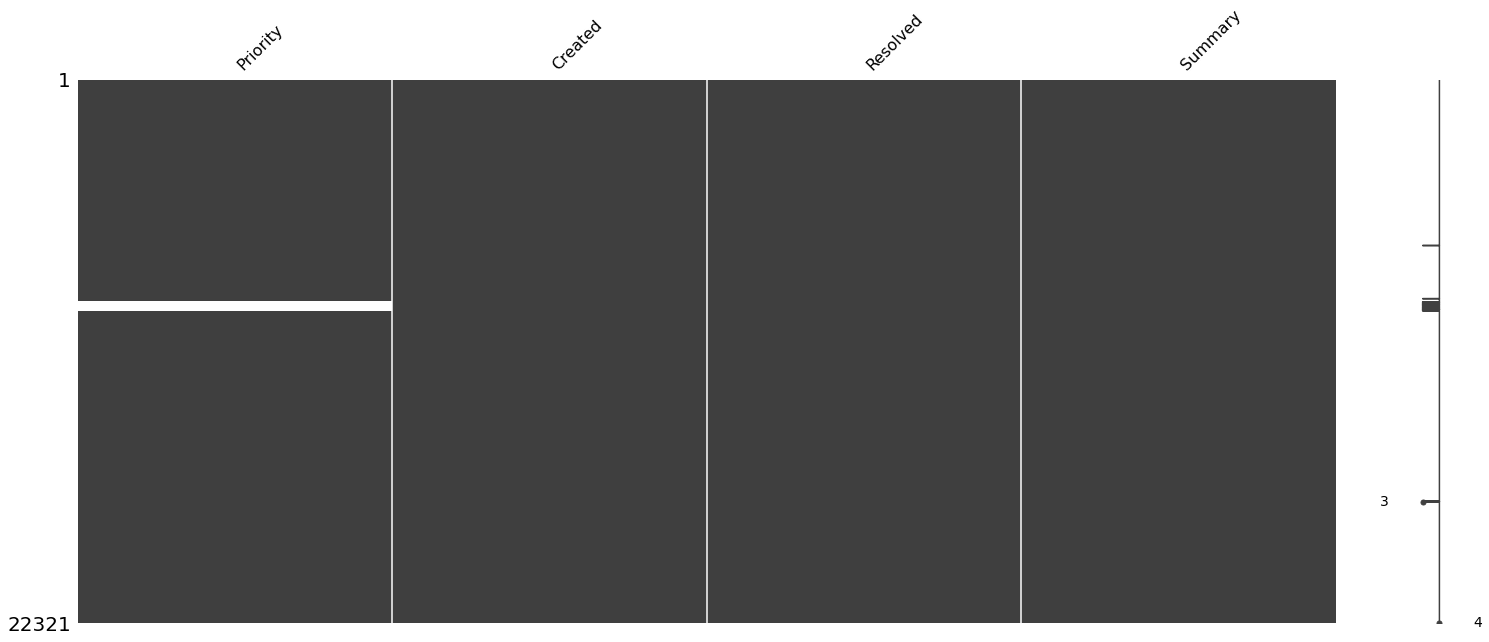

In [11]:
msno.matrix(data_raw)

<AxesSubplot:>

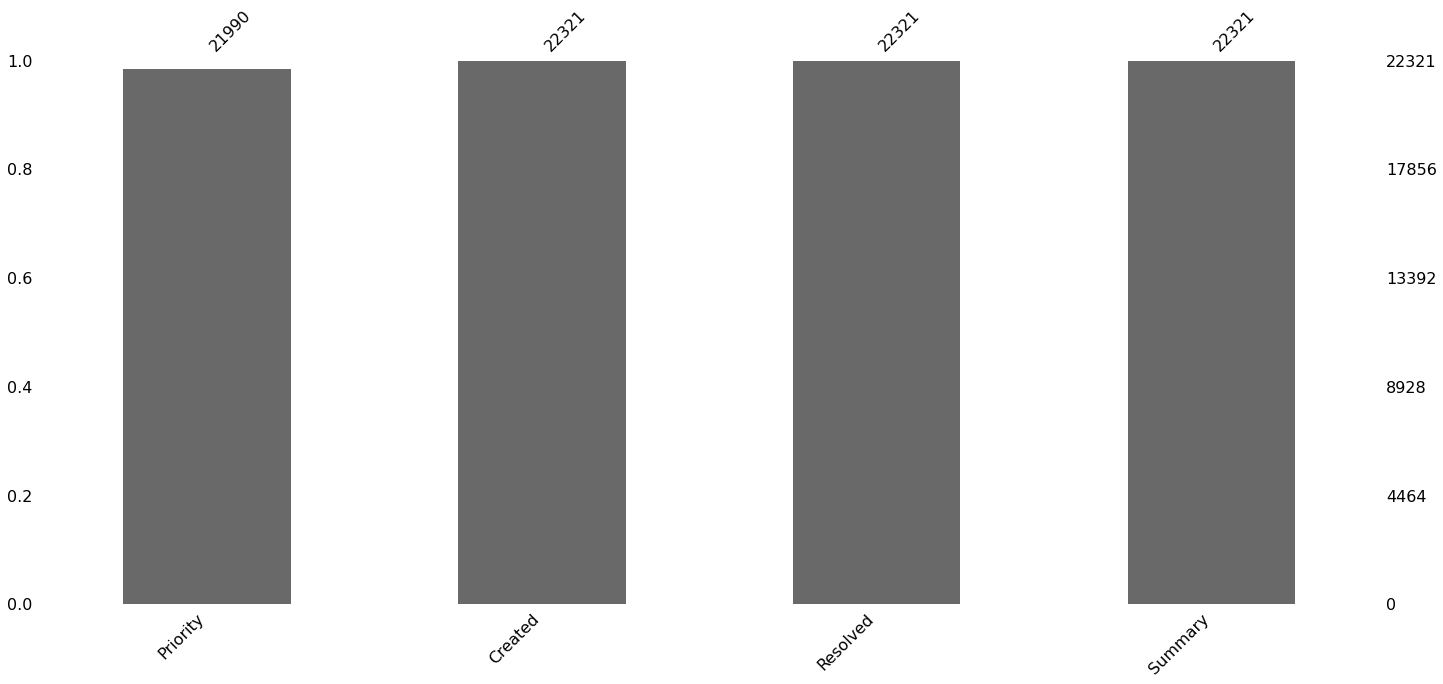

In [12]:
msno.bar(data_raw)

<AxesSubplot:>

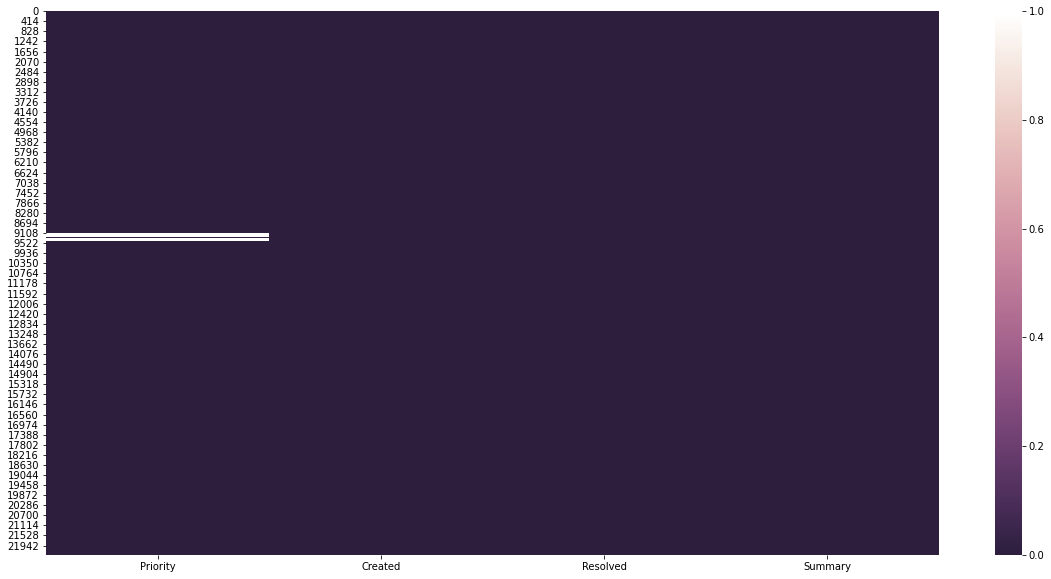

In [13]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

# We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(data_raw.isnull(), cmap=cmap)

<AxesSubplot:>

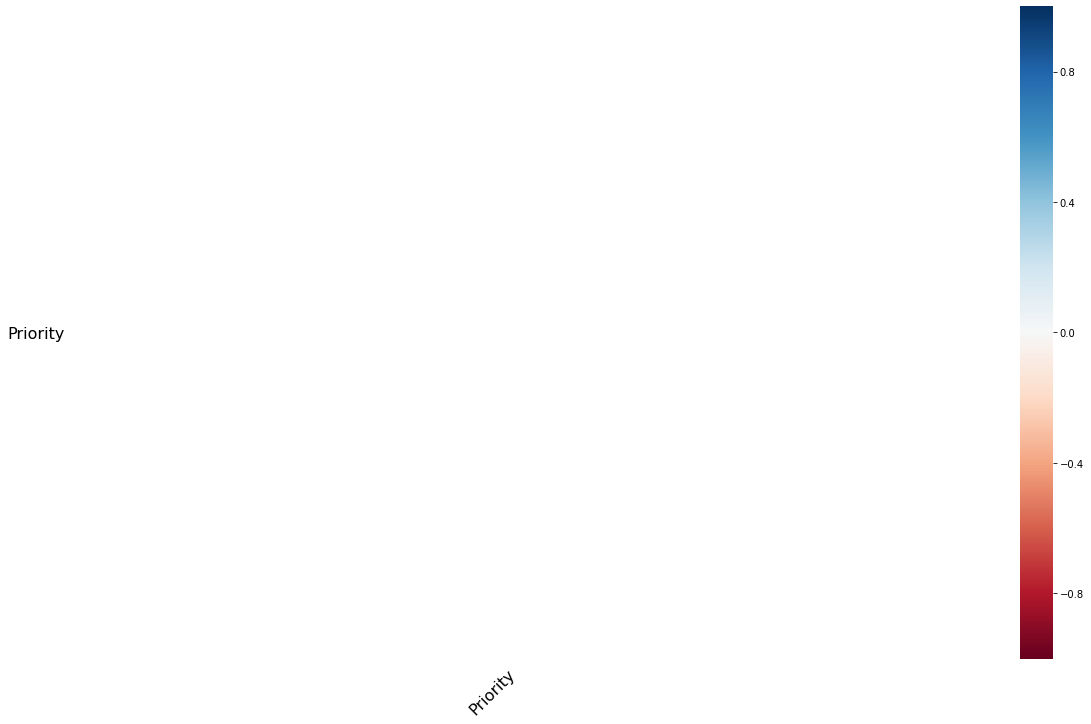

In [14]:
msno.heatmap(data_raw)

In [118]:
data_raw = data_raw.dropna( how='all',
                    subset=['Resolved'])

In [119]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 0 to 22320
Data columns (total 4 columns):
Priority    21990 non-null object
Created     22321 non-null object
Resolved    22321 non-null object
Summary     22321 non-null object
dtypes: object(4)
memory usage: 871.9+ KB


In [120]:
data_raw = data_raw.dropna( how='all',
                    subset=['Priority'])

In [121]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 22320
Data columns (total 4 columns):
Priority    21990 non-null object
Created     21990 non-null object
Resolved    21990 non-null object
Summary     21990 non-null object
dtypes: object(4)
memory usage: 859.0+ KB


<AxesSubplot:ylabel='Priority'>

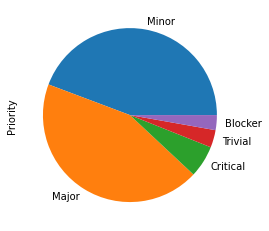

In [127]:

data_raw['Priority'].value_counts().plot.pie()

<AxesSubplot:ylabel='Priority'>

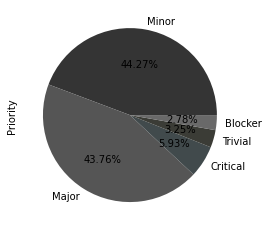

In [138]:
data_raw['Priority'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['#343434', '#555555','#414A4C','#3B3C36','#696969'] )

# preprocessing of time 

In [139]:
type(pd.to_datetime(data_raw['Resolved'])[0])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
(pd.to_datetime(data_raw['Resolved']).head() - pd.to_datetime(data_raw['Created']).head())/np.timedelta64(1, 'D')

0    27.430556
1    24.275000
2    24.715972
3    0.009722 
4    0.622222 
dtype: float64

In [141]:
data_raw['time'] = (pd.to_datetime(data_raw['Resolved'])-  pd.to_datetime(data_raw['Created']))/np.timedelta64(1, 'D')

In [142]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 22320
Data columns (total 5 columns):
Priority    21990 non-null object
Created     21990 non-null object
Resolved    21990 non-null object
Summary     21990 non-null object
time        21990 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [143]:
data_raw['time'].isnull().sum()

0

In [144]:
def conv(hi):
    hi = hi/30
    return (round(hi))
    

data_raw['time'] = data_raw['time'].apply(conv)

In [145]:

data_raw['time'].describe()

count    21990.000000
mean     5.037972    
std      14.505798   
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      142.000000  
Name: time, dtype: float64

<AxesSubplot:xlabel='time'>

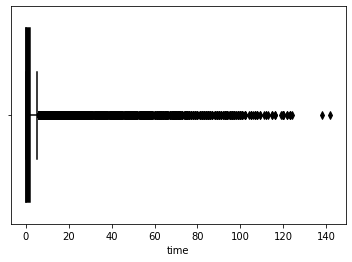

In [146]:
import seaborn as sns
#sns.boxplot(x=data_raw['time'])
sns.boxplot(x = data_raw['time'], data = data_raw,color="black")

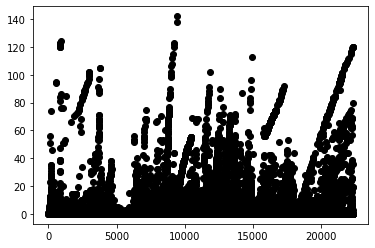

In [147]:

import matplotlib.pyplot as plt
plt.scatter(data_raw['time'].index, data_raw['time'],color="black")
plt.show()

In [148]:
data_raw['time']  = data_raw['time'].clip(lower=data_raw['time'].quantile(0.05), upper=data_raw['time'].quantile(0.95))

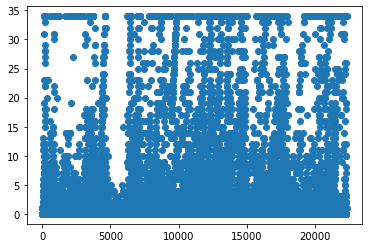

In [149]:
plt.scatter(data_raw['time'].index, data_raw['time'])
plt.show()

In [30]:
import plotly.express as px
fig = px.scatter(x=data_raw['time'].index, y=data_raw['time'])
fig.show()

In [31]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data_raw['Summary'], 50)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Summary' , 'count'])
df1.groupby('Summary').sum()['count'].iplot(
    kind='bar', yTitle='Count', linecolor='black', color="black")


in 5417
not 4732
to 3722
with 3110
the 2642
when 2642
for 2453
is 2440
spring 2351
of 2024
on 1995
and 1679
does 1559
using 1061
error 1013
from 994
should 981
fails 894
doesn 872
be 849
work 840
method 839
if 757
an 728
are 727
class 713
exception 711
java 697
type 690
project 614
as 606
bean 588
by 582
cannot 549
org 541
null 536
support 533
no 531
roo 509
can 496
query 487
xml 485
data 469
use 467
wrong 462
npe 461
sts 448
property 439
grails 438
missing 437


In [33]:
df1 = df1.sample(frac=1)
df1 = df1.reset_index(drop = False)

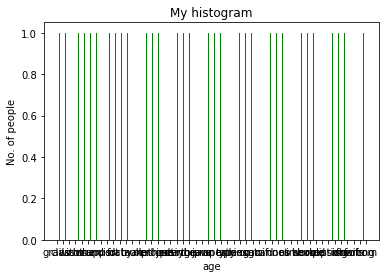

In [34]:

# plotting a histogram
plt.hist(df1['Summary'], df1.shape[0], color = 'green',
        histtype = 'bar', rwidth = 0.1)
  
# x-axis label
plt.xlabel('age')
# frequency label
plt.ylabel('No. of people')
# plot title
plt.title('My histogram')
  
# function to show the plot
plt.show()

In [35]:
import plotly.express as px
df = px.data.tips()


df



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
df = px.data.gapminder().query("year==2007 and continent=='Americas'")

In [37]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
143,Bolivia,Americas,2007,65.554,9119152,3822.137084,BOL,68
179,Brazil,Americas,2007,72.390,190010647,9065.800825,BRA,76
251,Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
287,Chile,Americas,2007,78.553,16284741,13171.638850,CHL,152
311,Colombia,Americas,2007,72.889,44227550,7006.580419,COL,170
359,Costa Rica,Americas,2007,78.782,4133884,9645.061420,CRI,188
395,Cuba,Americas,2007,78.273,11416987,8948.102923,CUB,192
443,Dominican Republic,Americas,2007,72.235,9319622,6025.374752,DOM,214
455,Ecuador,Americas,2007,74.994,13755680,6873.262326,ECU,218


In [38]:
fig = px.scatter(df1, x="Summary", y="count")
#fig.update_traces(textposition='top center')
#fig.update_layout(title_text='Life Expectency', title_x=0.5)
fig.show()

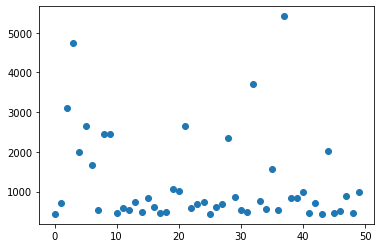

In [39]:
plt.scatter(df1['count'].index,df1['count'])

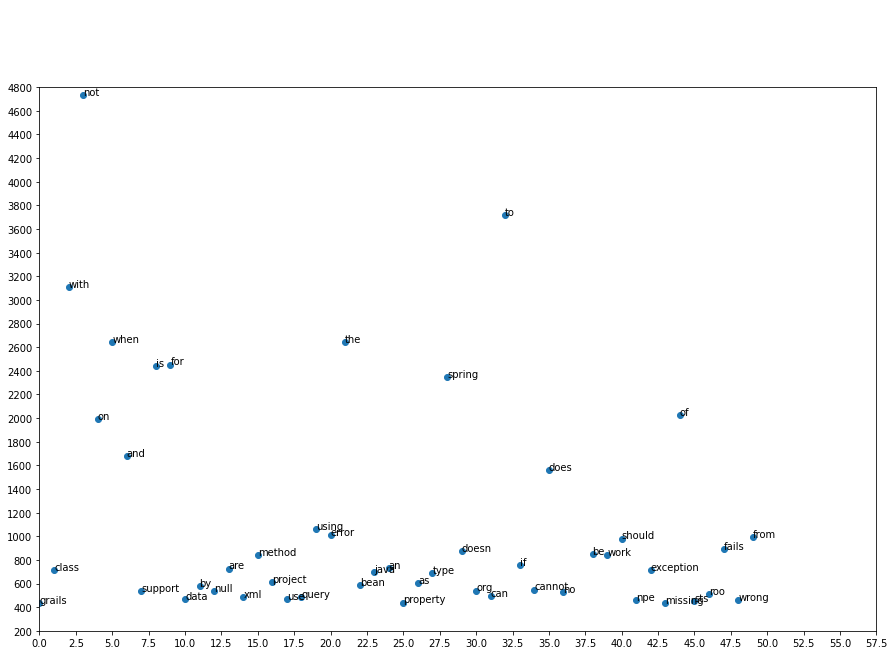

In [40]:
import matplotlib.pyplot as plt
  
# Preparing dataset
x = df1['Summary'].index.to_list()
y = df1['count'].to_list()
text =  df1['Summary'].to_list()
# plotting scatter plot
plt.figure(figsize=(15,10))
plt.scatter(x, y)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
# adjusting the scale of the axes


plt.xlim([0, 51])
plt.ylim([400, 1000])
plt.xticks(np.arange(0, 60, 2.5))
plt.yticks(np.arange(200, 5000, 200))

plt.show()

In [41]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [42]:
import spacy
nlp = spacy.load('en')

In [43]:
data_raw['parsed'] = data_raw.Summary.apply(nlp)

In [44]:
print("Document Count")
print(data_raw.groupby('Priority')['Summary'].count())
print("Word Count")
data_raw.groupby('Priority').apply(lambda x: x.Summary.apply(lambda x: len(x.split())).sum())

Document Count
Priority
Blocker      612
Critical    1305
Major       9623
Minor       9736
Trivial      714
Name: Summary, dtype: int64
Word Count


Priority
Blocker      4959
Critical    10847
Major       82597
Minor       81804
Trivial      5222
dtype: int64

In [45]:
corpus = st.CorpusFromParsedDocuments(data_raw, category_col='Priority', parsed_col='parsed').build()

In [150]:
data_raw['time'].describe()

count    21990.000000
mean     3.704729    
std      8.656228    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      34.000000   
Name: time, dtype: float64

In [151]:
data_raw['time'].value_counts()

0     13563
1     2691 
34    1123 
2     1061 
3     576  
4     386  
5     292  
6     236  
7     203  
8     186  
9     150  
10    133  
11    118  
12    108  
16    104  
13    98   
18    85   
17    83   
14    82   
15    68   
20    62   
21    60   
19    55   
23    55   
22    53   
26    42   
28    42   
24    41   
27    40   
30    39   
25    39   
33    33   
32    29   
31    29   
29    25   
Name: time, dtype: int64

In [152]:
def convsmall(hi):
    hi = str(hi)
    for i in range(len(hi)-1,0,-1):
         hi = hi.replace(hi[i],'0')
    return(int(hi))

In [153]:
data_raw['time']
#data_raw['time'] = data_raw['time'].apply(convsmall)

0        1 
1        1 
2        1 
3        0 
4        0 
        .. 
22316    0 
22317    0 
22318    34
22319    34
22320    1 
Name: time, Length: 21990, dtype: int64

In [154]:
data_raw['time'].value_counts()

0     13563
1     2691 
34    1123 
2     1061 
3     576  
4     386  
5     292  
6     236  
7     203  
8     186  
9     150  
10    133  
11    118  
12    108  
16    104  
13    98   
18    85   
17    83   
14    82   
15    68   
20    62   
21    60   
19    55   
23    55   
22    53   
26    42   
28    42   
24    41   
27    40   
30    39   
25    39   
33    33   
32    29   
31    29   
29    25   
Name: time, dtype: int64

In [155]:
#0,1to5,6toremaining
13768,2691+1061+576+386+292,236+203+186+150+816+406+1220

(13768, 5006, 3217)

In [156]:
for i in data_raw['time']:
    if i <=5  and i>0:
        data_raw["time"].replace({i:1}, inplace=True)

In [157]:
data_raw["time"].value_counts()

0     13563
1     5006 
34    1123 
6     236  
7     203  
8     186  
9     150  
10    133  
11    118  
12    108  
16    104  
13    98   
18    85   
17    83   
14    82   
15    68   
20    62   
21    60   
23    55   
19    55   
22    53   
28    42   
26    42   
24    41   
27    40   
25    39   
30    39   
33    33   
32    29   
31    29   
29    25   
Name: time, dtype: int64

In [158]:
for i in data_raw['time']:
    if i >=6:
        data_raw["time"].replace({i:2}, inplace=True)
    

In [159]:
data_raw["time"].value_counts()

0    13563
1    5006 
2    3421 
Name: time, dtype: int64

In [160]:
html = produce_scattertext_explorer(corpus,
                                    category='Minor',
                                    category_name='spring',
                                    not_category_name='Spring',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=100,
                                    #transform=st.Scalers.scale,
                                    metadata=data_raw['time'])
file_name = 'hi.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

# priority 

In [161]:
data_raw.Priority.value_counts()

Minor       9736
Major       9623
Critical    1305
Trivial     714 
Blocker     612 
Name: Priority, dtype: int64

In [162]:
data_raw["Priority"].replace({"Trivial": "Minor", "Blocker": "Critical"}, inplace=True)

In [163]:
data_raw.Priority.value_counts()

Minor       10450
Major       9623 
Critical    1917 
Name: Priority, dtype: int64

<AxesSubplot:ylabel='Priority'>

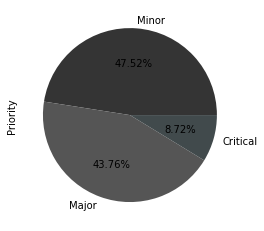

In [164]:
data_raw['Priority'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['#343434', '#555555','#414A4C','#3B3C36','#696969'] )

In [60]:
data_raw["Priority"].replace({"Critical": 0, "Major": 1,"Minor":2}, inplace=True)
data_raw["Priority"]

0        1
1        1
2        0
3        2
4        1
        ..
22316    1
22317    1
22318    1
22319    2
22320    1
Name: Priority, Length: 21990, dtype: int64

In [61]:
data_raw["Priority"].value_counts()

2    10450
1     9623
0     1917
Name: Priority, dtype: int64

# deleting unnecessary rows

In [62]:
data_raw.columns.values

array(['Priority', 'Created', 'Resolved', 'Summary', 'time', 'parsed'],
      dtype=object)

In [63]:
data_raw = data_raw[['Priority','Summary','time']]

In [64]:
data_raw

,Priority,Summary,time
0,1,Endpoint Mapping and Saxon,1
1,1,Thread safe problem during wsdl generation,1
2,0,SaajUtils wrong way to detect SAAJ version,1
3,2,Incorrect javadoc in org.springframework.ws.so...,0
4,1,Loading default key store overwrites truststore,0
...,...,...,...
22316,1,Multi-dimensional array brakes HTTP invokers r...,0
22317,1,Possible NPE in JmsUtils.buildExceptionMessage...,0
22318,1,throws clause ignored by pointcut parser,2
22319,2,Can bind to generic attribute but not generic ...,2


In [65]:
categories = list(data_raw.columns.values)
categories = categories[0:]
categories = ['Priority', 'time']

In [66]:
# data cleaning for summary column

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [68]:
data_raw['Summary'].head()

0                           Endpoint Mapping and Saxon
1           Thread safe problem during wsdl generation
2           SaajUtils wrong way to detect SAAJ version
3    Incorrect javadoc in org.springframework.ws.so...
4      Loading default key store overwrites truststore
Name: Summary, dtype: object

In [69]:
data = data_raw

In [70]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = re.sub('http.*', '',cleaned)
    cleaned = re.sub('-', '',cleaned)
    cleaned = re.sub('[!@#$%^&+*]/g','',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [71]:
data['Summary'] = data['Summary'].str.lower()
data['Summary'] = data['Summary'].apply(cleanHtml)
data['Summary'] = data['Summary'].apply(cleanPunc)
#data['Summary'] = data['Summary'].apply(keepAlpha)
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
data['Summary'].head(20)

0     endpoint mapping and saxon                                                                       
1     thread safe problem during wsdl generation                                                       
2     saajutils wrong way to detect saaj version                                                       
3     incorrect javadoc in org springframework ws soap soapfault                                       
4     loading default key store overwrites truststore                                                  
5     xpathexpression is not threadsafe                                                                
6     wssecurity exception not being handled                                                           
7     order of setting properties in webservicegatewaysupport                                          
8     fix mtom sample                                                                                  
9     payloadvalidatinginterceptor ignores schema list          

In [72]:
stop_words = set(stopwords.words('english'))

In [73]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Summary'] = data['Summary'].apply(removeStopWords)
data.head()

,Priority,Summary,time
0,1,endpoint mapping saxon,1
1,1,thread safe problem wsdl generation,1
2,0,saajutils wrong way detect saaj version,1
3,2,incorrect javadoc org springframework ws soap soapfault,0
4,1,loading default key store overwrites truststore,0


In [74]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Summary'] = data['Summary'].apply(stemming)
data.head()

,Priority,Summary,time
0,1,endpoint map saxon,1
1,1,thread safe problem wsdl generat,1
2,0,saajutil wrong way detect saaj version,1
3,2,incorrect javadoc org springframework ws soap soapfault,0
4,1,load default key store overwrit truststor,0


In [75]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(15393, 3)
(6597, 3)


In [76]:
train.index

Int64Index([ 8885, 14169,  6798, 11634,  3318, 18652, 11640,  1479,   622,
             6246,
            ...
            22293,  4426, 17177,  6265, 11611, 12291, 21906,  5390,   860,
            16122],
           dtype='int64', length=15393)

In [77]:
train_text = train['Summary']
test_text = test['Summary']

In [78]:
y_test = test[['Priority','time']]

In [79]:
y_train = train[['Priority','time']]

In [80]:
y_train.index

Int64Index([ 8885, 14169,  6798, 11634,  3318, 18652, 11640,  1479,   622,
             6246,
            ...
            22293,  4426, 17177,  6265, 11611, 12291, 21906,  5390,   860,
            16122],
           dtype='int64', length=15393)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer = TfidfVectorizer()
vectorizer.fit(train_text)
#vectorizer.fit(train_text)
#vectorizer.fit(test_text)

TfidfVectorizer()

In [82]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Summary'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Summary'], axis=1)

In [83]:
x_train.shape

(15393, 11918)

In [84]:
x_train

<15393x11918 sparse matrix of type '<class 'numpy.float64'>'
	with 93770 stored elements in Compressed Sparse Row format>

In [85]:
x_train = pd.DataFrame(x_train.toarray())
x_test = pd.DataFrame(x_test.toarray())

In [86]:
y_train = y_train.reset_index(drop = True)

In [87]:
y_train

,Priority,time
0,2,2
1,2,0
2,1,0
3,1,1
4,2,2
...,...,...
15388,1,2
15389,2,0
15390,1,0
15391,1,1


In [88]:
X_res=x_train
y_res=y_train

# smote

In [126]:
# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors


In [63]:

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

In [64]:
def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

In [195]:
def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

In [196]:
def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

In [197]:
def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

In [198]:
 X_sub, y_sub = get_minority_instace(x_train, y_train) 

In [199]:
X_sub.shape,y_sub.shape

((1787, 11916), (1787, 2))

In [200]:
X_res,y_res =MLSMOTE(X_sub, y_sub, 100) 

NameError: name 'NearestNeighbors' is not defined

In [564]:
X_res.shape,y_res.shape

((3603, 11916), (3603, 2))

In [565]:
y_res.shape

(3603, 2)

In [579]:
y_res

,Priority,time
0,1.0,1.0
1,1.0,1.0
2,2.0,1.0
3,2.0,1.0
4,2.0,1.0
...,...,...
95,1.0,1.0
96,1.0,1.0
97,1.0,1.0
98,1.0,1.0


# model building 

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [90]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_res, y_res[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print("\n")

**Processing Priority comments...**

Test accuracy is 0.5276640897377596




**Processing time comments...**

Test accuracy is 0.6186145217523117


Wall time: 4min 27s


In [91]:
y_res

,Priority,time
0,2,2
1,2,0
2,1,0
3,1,1
4,2,2
...,...,...
15388,1,2
15389,2,0
15390,1,0
15391,1,1


In [92]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_res, y_res)



Wall time: 20.6 s


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [93]:
# predict
predictions = classifier.predict(x_test)

# accuracy


In [94]:
predictions

<6597x2 sparse matrix of type '<class 'numpy.int64'>'
	with 9045 stored elements in Compressed Sparse Column format>

In [95]:
df = pd.DataFrame(predictions.toarray())

In [96]:
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)

In [97]:

print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")

Accuracy =  0.3333333333333333




In [98]:
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))

Accuracy =  0.2928603910868577


# classifer chains

In [99]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [100]:
y_res['Priority'].value_counts()

2    7297
1    6750
0    1346
Name: Priority, dtype: int64

In [105]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(X_res, y_res)

# predict
predictions = classifier.predict(x_test)



Wall time: 3min 7s


In [106]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)

In [107]:
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

Accuracy =  0.5259966651508261
Accuracy =  0.6077004699105654




In [108]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test['Priority'], df['Priority']))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.02      0.04       571
           1       0.50      0.55      0.52      2873
           2       0.55      0.60      0.57      3153

    accuracy                           0.53      6597
   macro avg       0.47      0.39      0.38      6597
weighted avg       0.51      0.53      0.51      6597



### 3.4. Label Powerset

In [142]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [143]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)


Wall time: 1min 8s


In [144]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")

Accuracy =  0.43625890556313474




In [145]:
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

Accuracy =  0.571168713051387




### 3.5. Adapted Algorithm

In [311]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [312]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)



IndexError: column index (16) out of bounds

In [313]:
df = pd.DataFrame(predictions.toarray())
df.rename(columns = {0:'Priority',1:'time'}, inplace = True)
# accuracy
print("Accuracy = ",accuracy_score(y_test['Priority'],df['Priority']))
print("\n")
print("Accuracy = ",accuracy_score(y_test['time'],df['time']))
print("\n")

Accuracy =  0.4368854637257507


Accuracy =  0.5939410045176721




In [4]:
hi = [("satya",30,10000),("rakesh",20,20000),("kaushtub",40,3000)]

In [9]:
hi.sort(key=lambda x:x[2])

In [10]:
hi

[('kaushtub', 40, 3000), ('satya', 30, 10000), ('rakesh', 20, 20000)]